In [2]:
# 1. Import libraries
import os
import fastf1
from fastf1 import plotting
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Ensure the cache directory exists
os.makedirs('fastf1_cache', exist_ok=True)

# Enable FastF1 cache to speed up repeated data loading
fastf1.Cache.enable_cache('fastf1_cache')  # Creates a cache folder in your working directory

core           INFO 	Loading data for Canadian Grand Prix - Race [v3.5.3]
req            INFO 	Using cached data for session_info
req            INFO 	Using cached data for driver_info
req            INFO 	Using cached data for session_status_data
req            INFO 	Using cached data for lap_count
req            INFO 	Using cached data for track_status_data
req            INFO 	Using cached data for _extended_timing_data
req            INFO 	Using cached data for timing_app_data
core           INFO 	Processing timing data...
req            INFO 	Using cached data for car_data
req            INFO 	Using cached data for position_data
req            INFO 	Using cached data for weather_data
req            INFO 	Using cached data for race_control_messages
core           INFO 	Finished loading data for 20 drivers: ['63', '1', '12', '81', '16', '44', '14', '27', '31', '55', '87', '22', '43', '5', '10', '6', '18', '4', '30', '23']
C:\Users\carte\AppData\Local\Packages\PythonSoftwareFoundatio

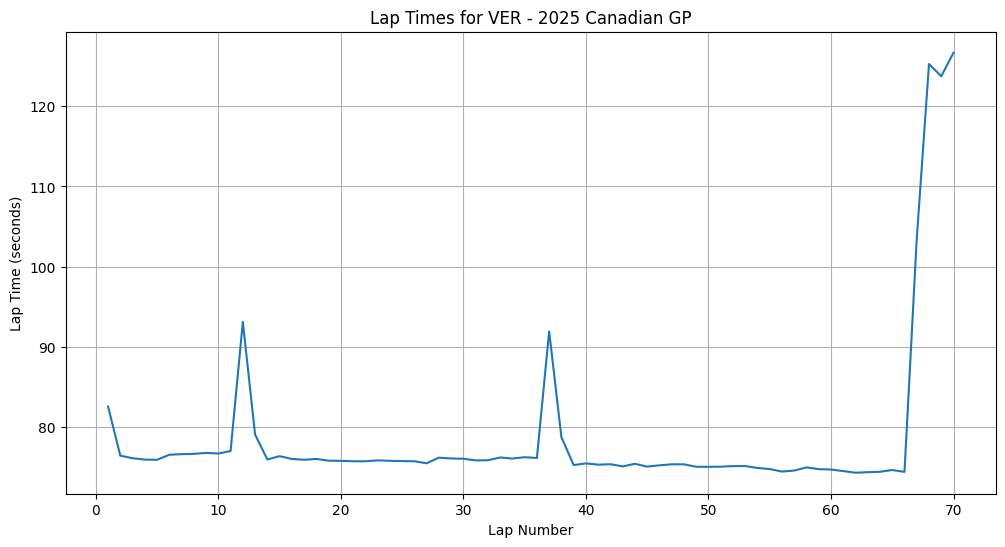

In [ ]:
session = fastf1.get_session(2025, 'Canada', 'R')
session.load()

driver_code = 'VER'  # Max Verstappen
driver_laps = session.laps.pick_driver(driver_code)

plt.figure(figsize=(12,6))
sns.lineplot(x=driver_laps['LapNumber'], y=driver_laps['LapTime'].dt.total_seconds())
plt.title(f'Lap Times for {driver_code} - 2025 Canadian GP')
plt.xlabel('Lap Number')
plt.ylabel('Lap Time (seconds)')
plt.grid(True)
plt.show()


C:\Users\carte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
C:\Users\carte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
C:\Users\carte\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\fastf1\core.py:3067: FutureWarning: pick_driver is deprecated and will be removed in a future release. Use pick_drivers instead.
  warnings.warn(("pick_driver is deprecated and will be removed"
C

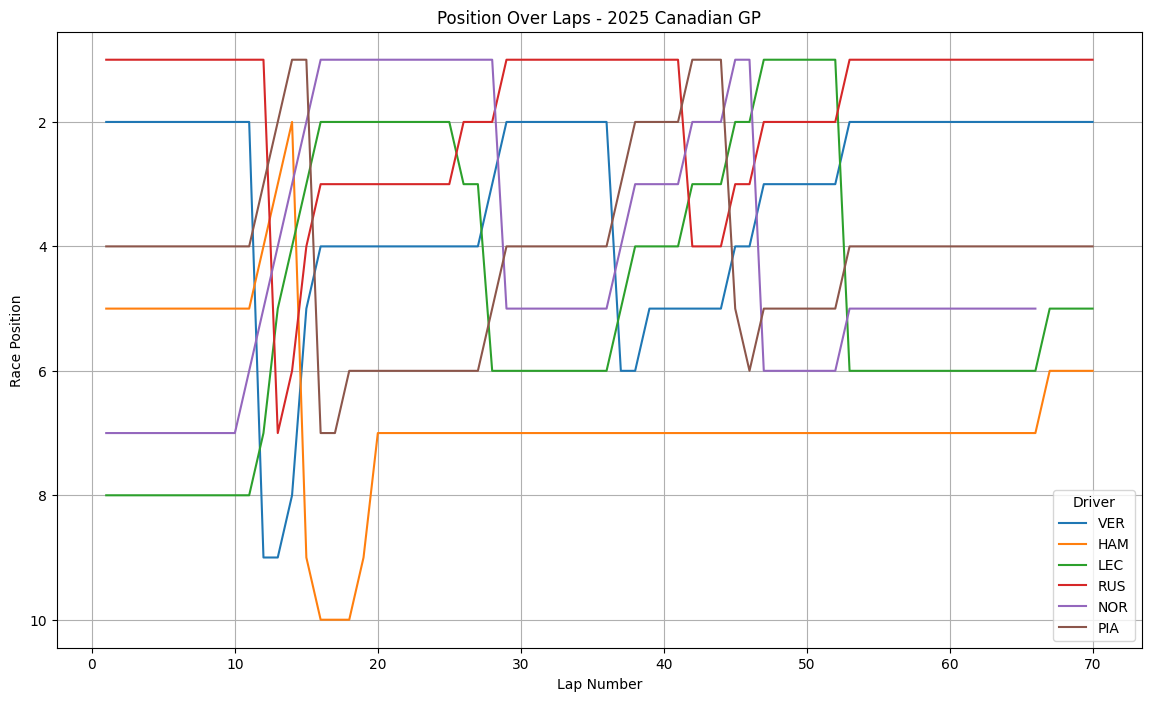

In [8]:
top_drivers = ['VER', 'HAM', 'LEC', 'RUS', 'NOR', 'PIA']

plt.figure(figsize=(14,8))
for drv in top_drivers:
    drv_laps = session.laps.pick_driver(drv)
    sns.lineplot(x=drv_laps['LapNumber'], y=drv_laps['Position'], label=drv)

plt.title('Position Over Laps - 2025 Canadian GP')
plt.xlabel('Lap Number')
plt.ylabel('Race Position')
plt.gca().invert_yaxis()  # Lower position is better
plt.legend(title='Driver')
plt.grid(True)
plt.show()


In [9]:
pit_stops = session.get_pit_stops()
pit_counts = pit_stops['Driver'].value_counts()

plt.figure(figsize=(10,6))
sns.barplot(x=pit_counts.index, y=pit_counts.values)
plt.title('Number of Pit Stops per Driver - 2025 Canadian GP')
plt.xlabel('Driver')
plt.ylabel('Pit Stops')
plt.show()


AttributeError: 'Session' object has no attribute 'get_pit_stops'